# GAN on CelebA Dataset

## Problem Description
We will try to generate celebrity faces from the CelebA large scale Large-scale CelebFaces Attributes Dataset. It has 202 thousand images of celebrity faces. We will target the generation of lower resolution and colored (RGB) 45x45x3 pixels images using a VAE.

# Prepare the Data

The dataset can be downloaded from the following website - 
https://mmlab.ie.cuhk.edu.hk/projects/CelebA.html
We will only use the images and not the annotations for our task, because we are targeting unconditional generation of images.

## Prepare downsampled, cropped data

As mentioned before, we will target the generation of 45x45x3 center cropped images. The dataset can be downloaded from 

https://drive.google.com/drive/folders/0B7EVK8r0v71pTUZsaXdaSnZBZzg?resourcekey=0-rJlzl934LzC-Xp28GeIBzQ

We will prepare the data with the help of tensorflow jpeg decode function and save it as numpy data for further use.

In [1]:
import zipfile
from tqdm import tqdm
import numpy as np
import tensorflow as tf

from PIL import Image
import io

def image_to_bytes(img):
    # Create a PIL image from the NumPy array
    pil_img = Image.fromarray(img)

    # Create a BytesIO object to hold the PNG data
    png_bytes_io = io.BytesIO()

    # Save the PIL image as PNG to the BytesIO object
    pil_img.save(png_bytes_io, format='PNG')

    # Get the PNG byte string from the BytesIO object
    png_byte_string = png_bytes_io.getvalue()

    return png_byte_string



# The dataset 'img_align_celeba.zip' is downloaded from
# https://drive.google.com/drive/folders/0B7EVK8r0v71pTUZsaXdaSnZBZzg?resourcekey=0-rJlzl934LzC-Xp28GeIBzQ
with zipfile.ZipFile('img_align_celeba.zip', 'r') as file:
    image_files = [f.filename for f in file.filelist 
                   if (not f.is_dir()) and f.filename.endswith('.jpg')]
    imgs = []
    for i, filename in enumerate(tqdm(image_files)):
        img = tf.io.decode_and_crop_jpeg(file.read(filename),
                                         crop_window=[10,0,88,88],
                                         ratio=2, channels=3).numpy()
        img = image_to_bytes(img)
        imgs.append(img)


100%|██████████| 202599/202599 [05:28<00:00, 616.98it/s]


In [4]:
import pyarrow as pa
import pyarrow.parquet as pq

table = pa.table({'idx': np.arange(len(imgs)), 'img': imgs})
pq.write_table(table, 'celeba_colored_88x88.parquet')

In [3]:
from PIL import Image
import numpy as np
import io


def bytes_to_image(png_byte_string):
    # Create a BytesIO object containing the PNG byte string
    png_bytes_io = io.BytesIO(png_byte_string)
    
    # Open the PNG image using PIL
    pil_img = Image.open(png_bytes_io)
    
    # Convert PIL image to NumPy array
    img_array = np.array(pil_img)
    
    return img_array

In [1]:
import pyarrow.parquet as pq

table = pq.read_table('celeba_colored_88x88.parquet')


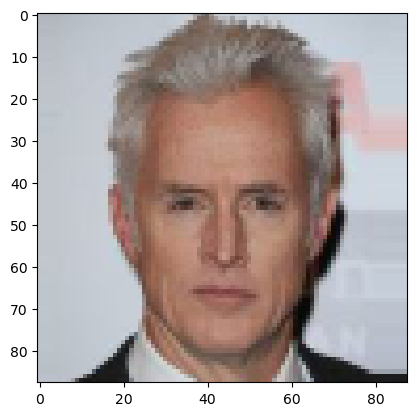

In [4]:
import matplotlib.pyplot as plt

img0 = table['img'][220].as_py()
img0 = bytes_to_image(img0)

plt.imshow(img0)